In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

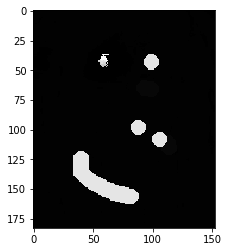

In [32]:
data_path = 'depth_roi_data/fake_depth_roi_many.png'
chip = cv2.imread(data_path, cv2.IMREAD_ANYDEPTH)

plt.imshow(chip, cmap='gray')

In [33]:
accepted_depth = 550
epsilon = 1000

rows = chip.shape[0]
cols = chip.shape[1]

Number of invalid pixels: 1893


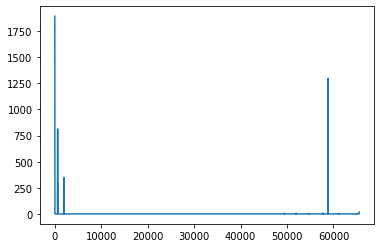

In [34]:
# Find number of zero pixels
hist = np.zeros(shape=(65536)).astype(np.uint32)
for row in range(0, rows):
    for col in range(0, cols):
        hist[chip[row, col]] += 1

plt.plot(hist)

print('Number of invalid pixels: {}'.format(hist[0]))

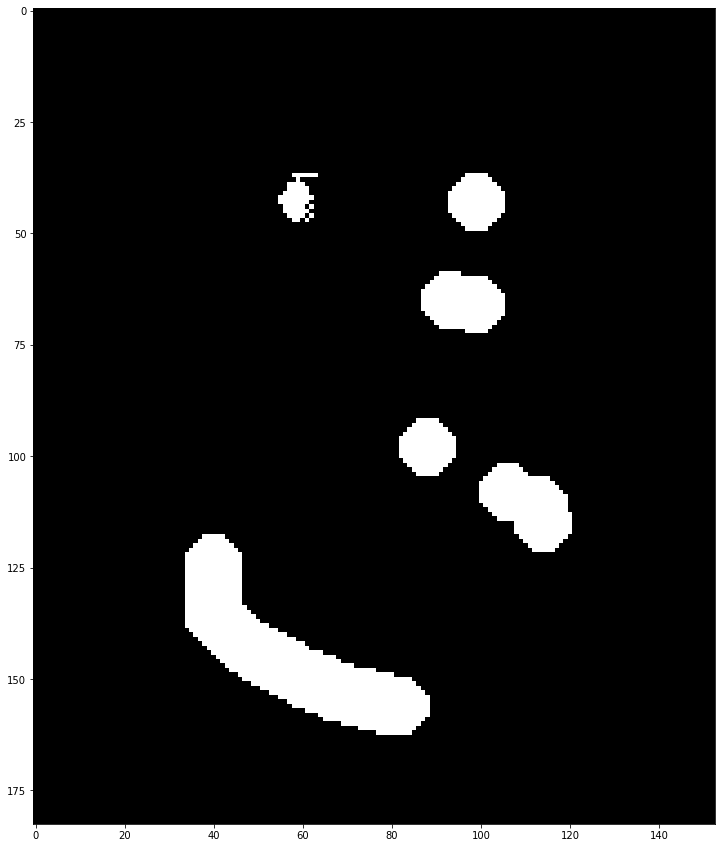

In [41]:
# Identify outliers
mask = np.zeros(shape=(rows, cols))

for row in range(0, rows):
    for col in range(0, cols):
        if np.fabs(accepted_depth - chip[row, col]) < epsilon:
            mask[row, col] = 1
            
mask = np.logical_not(mask)

plt.figure(figsize=(15, 15))
plt.imshow(mask, cmap='gray')

In [43]:
# Locate blobs
# A blob is a collection of pixel coordinates
class point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    @staticmethod
    def find_in(pnts, blobs):
        if len(blobs) == 0:
            return -1
        for i in range(0, len(blobs)):
            blob = blobs[i]
            num_found_pnts = 0
            for pnt in pnts:
                for ii in range(0, len(blob)):
                    blob_pnt = blob[ii]
                    if blob_pnt.x == pnt.x and blob_pnt.y == pnt.y:
                        return i
        return -1

Number of blobs:  225


In [ ]:
blobs = []
for row in range(0, rows):
    for col in range(0, cols):
        pxl = mask[row, col]
        if pxl:
            up = point(col, row - 1) if row > 0 else point(col, row)
            left = point(col - 1, row) if col > 0 else point(col, row)
            new_pnt = point(col, row)
            new_value = mask[row, col]
            
            if mask[up.y, up.x] == new_value and mask[left.y, left.x] == new_value:
                blobs[new_value - 1].append(new_pnt)
            else:
                blobs.append([new_pnt])
                
print('Number of blobs: ', len(blobs))

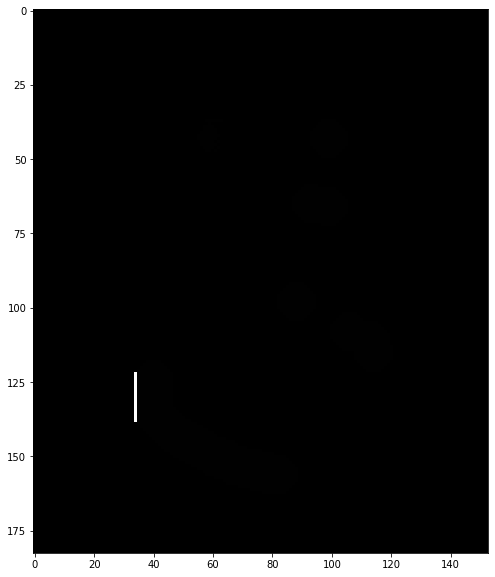

In [40]:
#Draw rectangles around them
disp = None
for blob in blobs:
    tl_x = int(np.min([pnt.x for pnt in blob]))
    tl_y = int(np.min([pnt.y for pnt in blob]))
    br_x = int(np.max([pnt.x for pnt in blob]))
    br_y = int(np.max([pnt.y for pnt in blob]))
    disp = cv2.rectangle(mask.astype(np.uint8), (tl_x, tl_y), (br_x, br_y), (255, 255, 255), thickness=1)
    
plt.figure(figsize=(10, 10))    
plt.imshow(disp, cmap='gray')

In [37]:
# flood fill to identify the blobs
def is_in(pnt, blobs):
    return True

blobs = []
for row in range(0, rows):
    for col in range(0, cols):
        pxl = mask[row, col]
        is_connection_lost = False
        pnt = point(col, row)
        if is_in(pnt, blobs):
            blobs.append([pnt])
            
            connected = []
            up = point(col, row - 1) if row > 0 else point(col, row)
            down = point(col, row + 1) if row < rows - 1 else point(col, rows - 1)
            left = point(col - 1, row) if col > 0 else point(col, row)
            right = point(col + 1, row) if col < cols - 1 else point(cols - 1, row)
                
            if mask[up.y, yp.x]:
                connected.append(up)
            if mask[down.y, down.x]:
                connected.append(down)
            if mask[left.y, left.x]:
                connected.append(left)
            if mask[right.y, right.x]:
                connected.append(right)
                
            for pnt in connected:
                is_connected = True
                while is_connected:
                    pass

SyntaxError: unexpected EOF while parsing (<ipython-input-37-b71f5af993a6>, line 32)